# Lab: Further Exploration

DS 5001 Text as Data

## Intro

### Purpose

We continue exploring the Gutenberg text, looking at simple word dispersion plots and correlations.

### Set Up

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import configparser
from scipy import stats

In [3]:
sns.set()

In [4]:
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

### Retrieve Data

In [5]:
K = pd.read_csv(f"{output_dir}/M01-ff-TOKENS.csv")[['term_str']]
V = pd.read_csv(f"{output_dir}/M01-ff-VOCAB.csv").set_index('term_str')

In [6]:
K.head()

,term_str
0,the
1,project
2,gutenberg
3,ebook
4,of


In [7]:
V.head()

,n,p
term_str,,
the,3511,0.040653
to,2864,0.033161
and,2847,0.032964
of,2687,0.031112
a,1648,0.019082


## Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


### Project tokens onto feature space

In [8]:
D = pd.get_dummies(K.term_str, dtype='int')

In [9]:
D

,1,105,15,1500,16,1760,1784,1785,1787,1789,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Another (slower) way to do one hot encoding
# K2 = K.copy()
# K2['n'] = 1
# D2 = K2.reset_index().set_index(['index','term_str']).unstack().fillna(0).astype(int)
# D2

In [10]:
# Another way to create the vocabulary
# V2 = D.sum().sort_values() 

In [10]:
# Remove rows without a 1
D = D[D.sum(1) == 1]

In [11]:
D.T.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,86356,86357,86358,86359,86360,86361,86362,86363,86364,86365
deficiency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
facility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
companions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
invalid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
century,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize

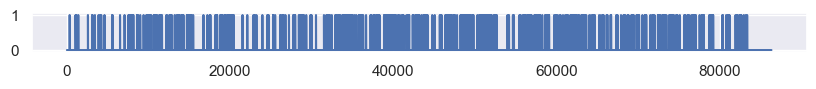

In [19]:
D['anne'].plot(figsize=(10, .5));

In [20]:
def word_plot(term_str):
    term_str = term_str.lower()
    D[term_str].plot(figsize=(10, .5), legend=False, title=term_str.upper());

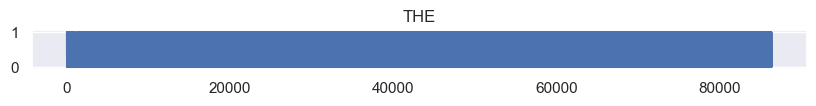

In [21]:
word_plot('the')

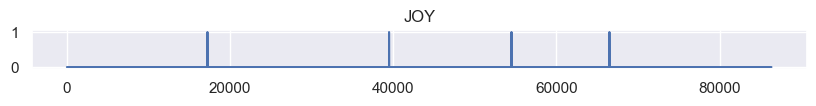

In [22]:
word_plot('joy')

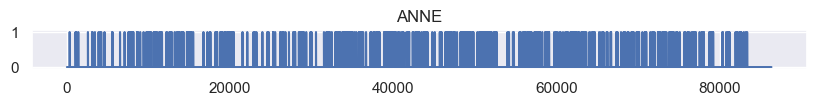

In [23]:
word_plot('anne')

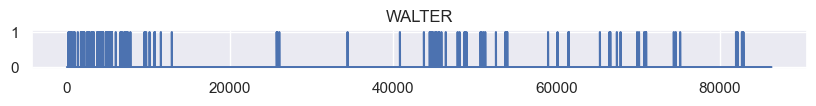

In [24]:
word_plot('walter')

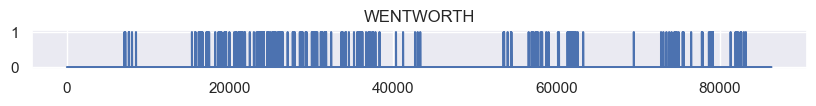

In [25]:
word_plot('wentworth')

## Correlation Graphs

We chunk narrative time into 100 segments of equal length (centiles). 

Then we count how many times each word appears in each centile.

Then we compare plots for pairs of words.

In [26]:
K['centile'] = (K.index * 100 / len(K)).astype('int') + 1

In [71]:
# K.centile.value_counts().value_counts() # View chunk sizes

In [27]:
M = [None, None]

### Count tokens by centile bag

In [28]:
M[0] = K.groupby(['centile','term_str']).term_str.count().unstack(fill_value=0)

In [29]:
M[0].head()

term_str,1,105,15,1500,16,1760,1784,1785,1787,1789,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
centile,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,0,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert to relative frequency

In [30]:
M[1] = M[0] / M[0].sum()

In [32]:
M[1].head()

term_str,1,105,15,1500,16,1760,1784,1785,1787,1789,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
centile,,,,,,,,,,,,,,,,,,,,,
1,0.6,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def pair_corr(a, b, method='kendall'):
    return M[0][[a,b]].corr(method=method).values[0,1].round(2)

In [35]:
pair_corr('wentworth', 'anne')

np.float64(0.05)

In [36]:
pair_corr('walter', 'anne')

np.float64(-0.06)

In [37]:
pair_corr('walter', 'wentworth')

np.float64(-0.24)

### Visualize

In [226]:
# M[0][['wentworth','anne']].plot(figsize=(20,5), style='o-');

In [38]:
def plot_cooc(a, b, norm=1):
    my_corr = pair_corr(a,b)
    M[norm][[a,b]].rolling(10).mean().plot(figsize=(20,5), style='o-', title=f"{a}, {b} {my_corr} ({norm})");

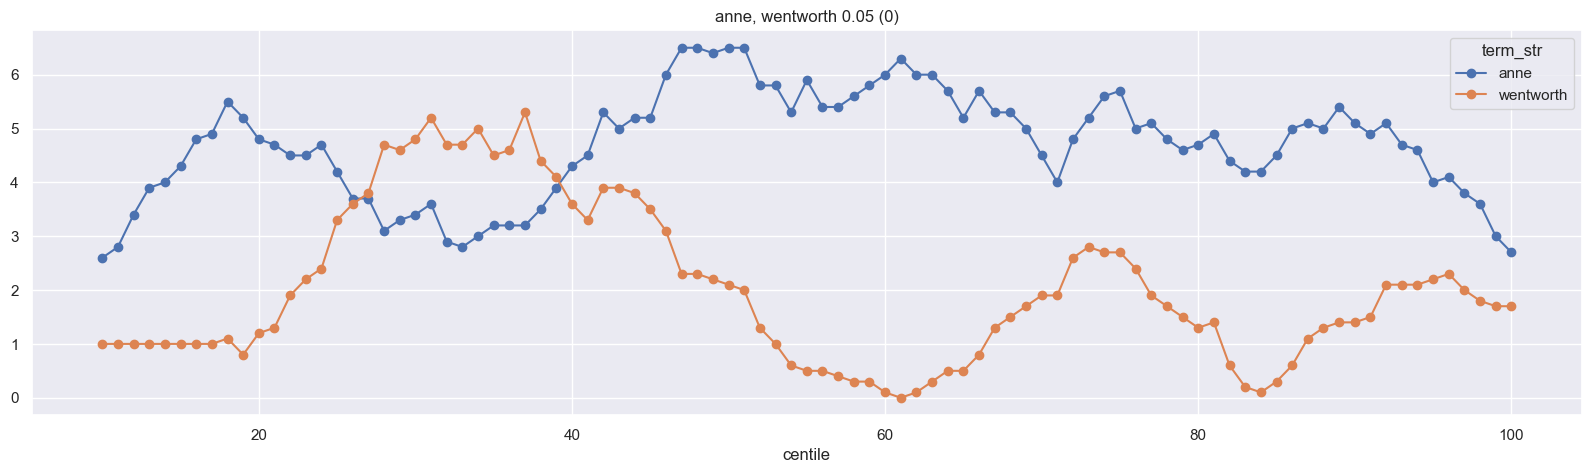

In [39]:
plot_cooc('anne','wentworth', 0)

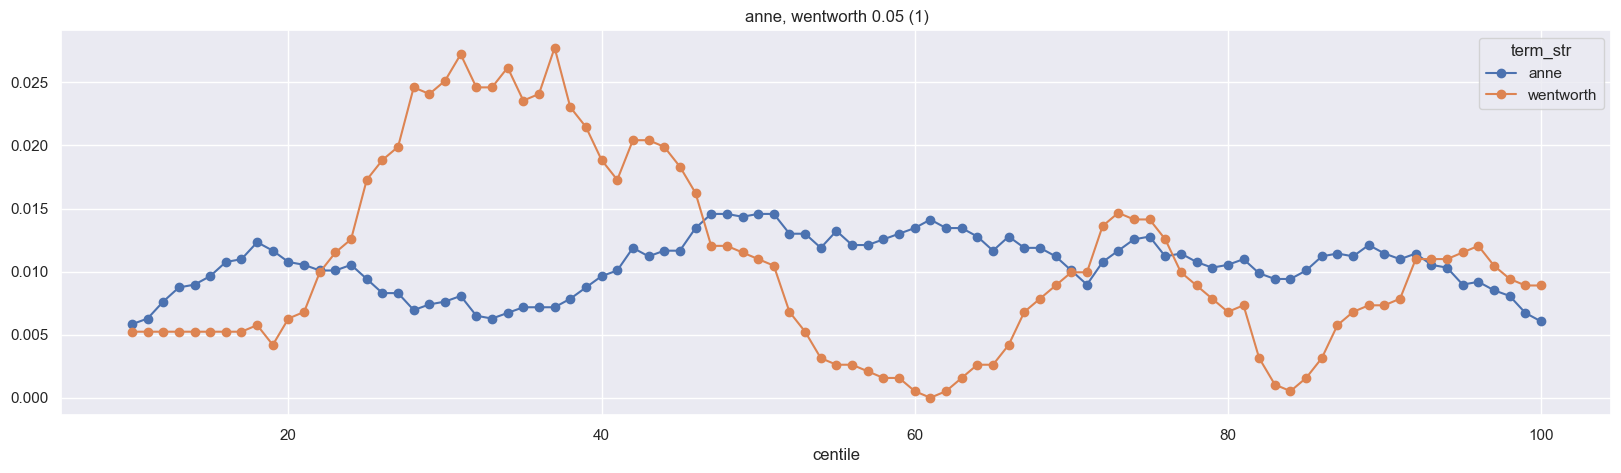

In [40]:
plot_cooc('anne','wentworth')

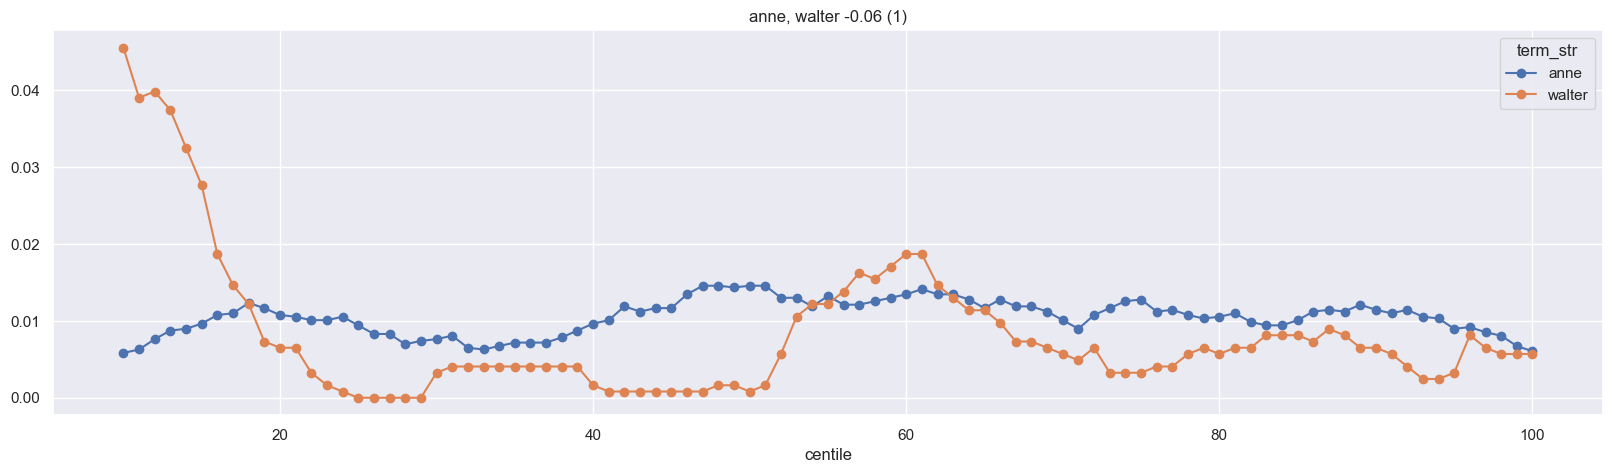

In [41]:
plot_cooc('anne','walter')

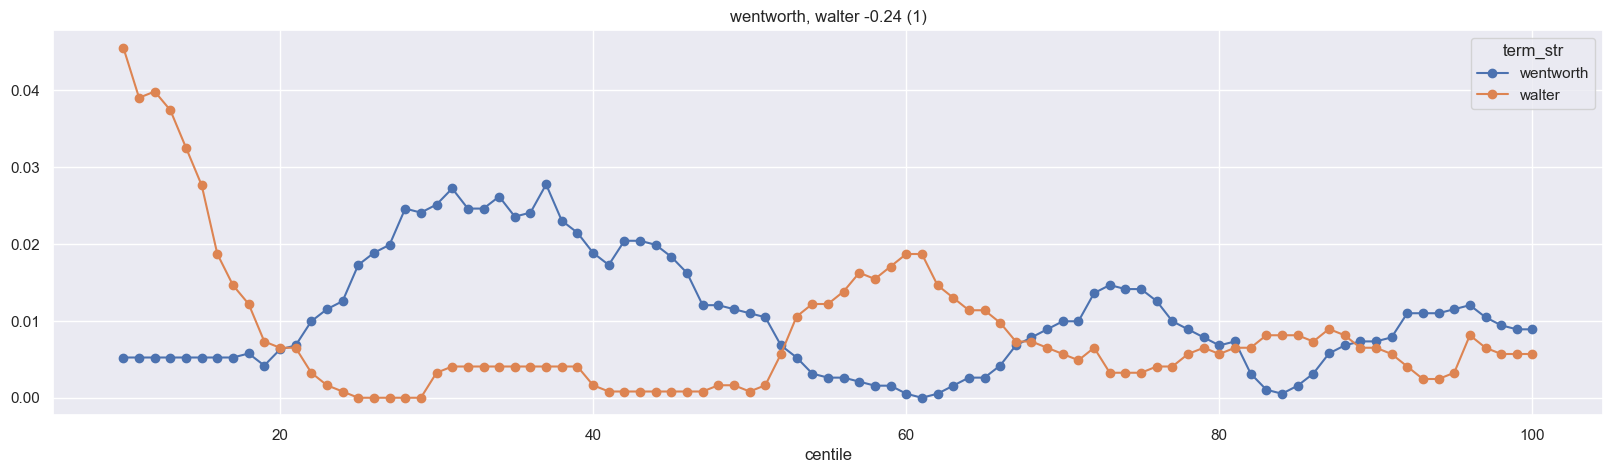

In [42]:
plot_cooc('wentworth','walter')

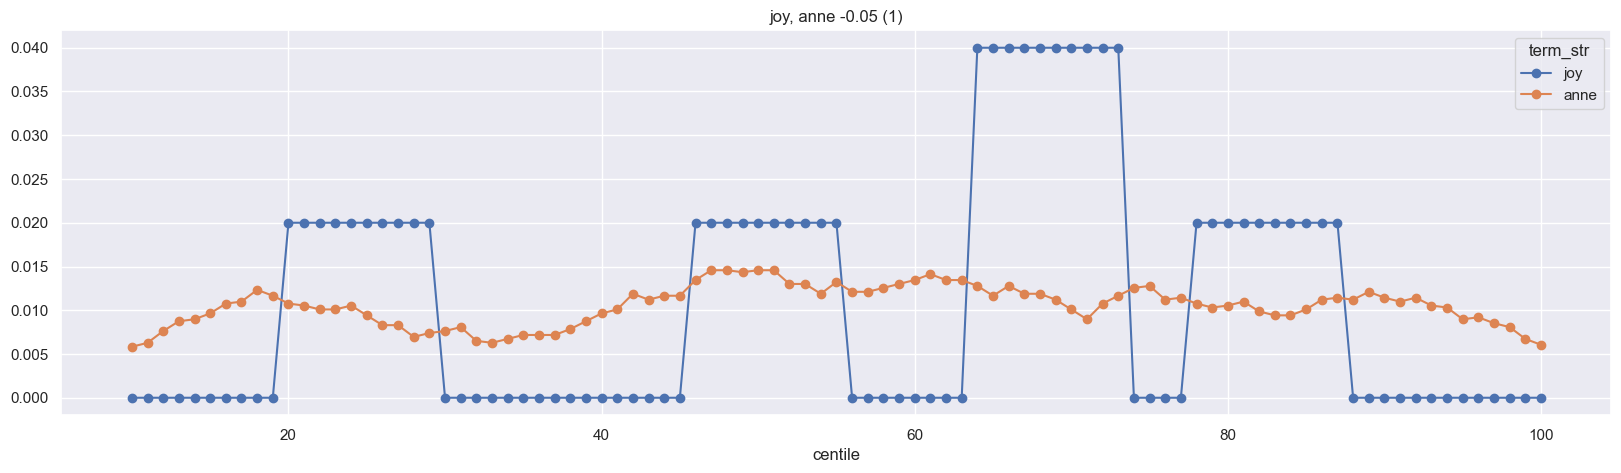

In [43]:
plot_cooc('joy','anne', 1)

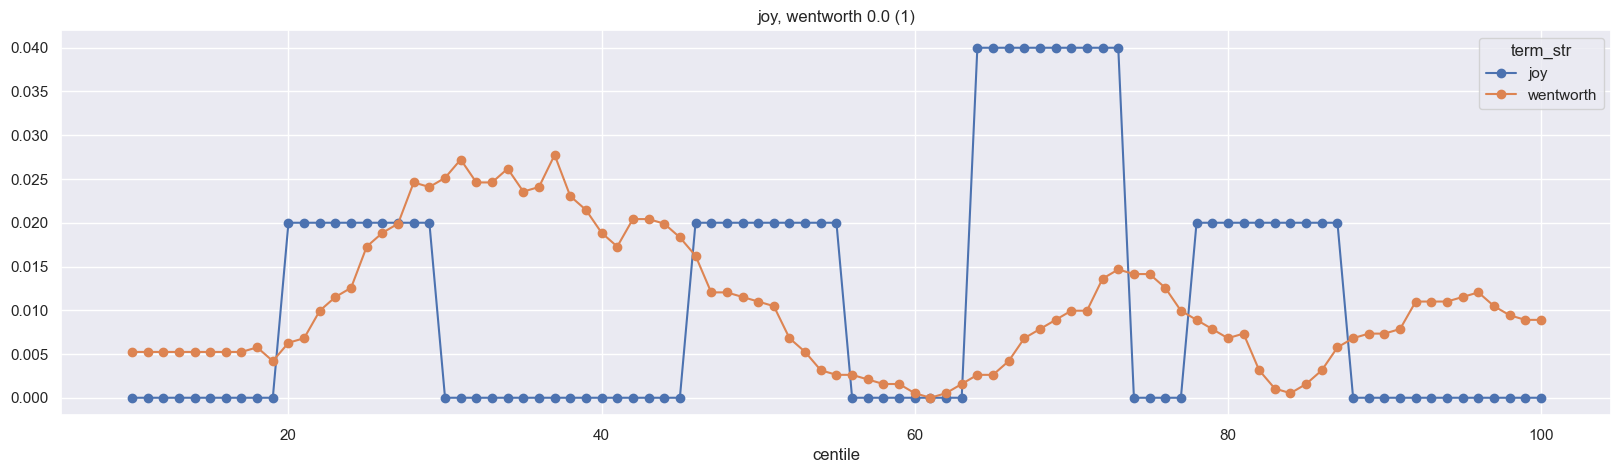

In [44]:
plot_cooc('joy','wentworth', 1)

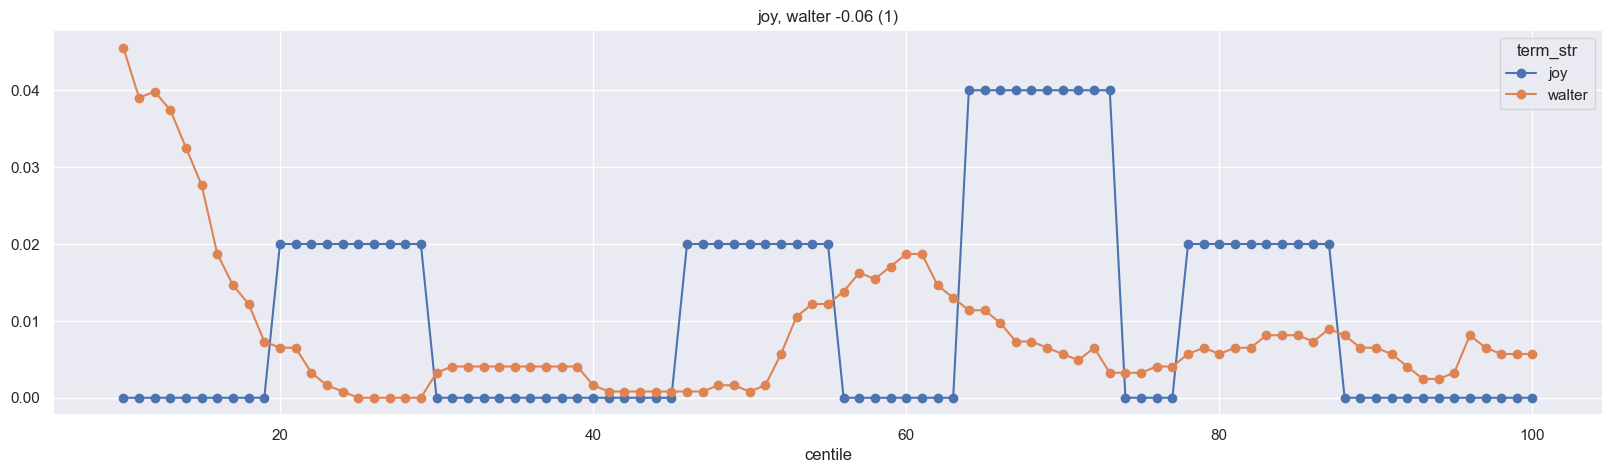

In [47]:
plot_cooc('joy','walter', 1)